<a href="https://colab.research.google.com/github/taeyoni/today-I-learned/blob/main/python22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#노트북 안에서 그래프를 그리기 위해
%matplotlib inline

# Import the standard Python Scientific Libraries
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress Deprecation and Incorrect Usage Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
question = pd.read_csv('/content/drive/MyDrive/Dart_b-data/schema.csv')
question.shape

(290, 3)

In [4]:
# 판다스로 선다형 객관식 문제에 대한 응답을 가져 옴
mcq = pd.read_csv('/content/drive/MyDrive/Dart_b-data/multipleChoiceResponses.csv', encoding="ISO-8859-1", low_memory=False)
mcq.shape

(16716, 228)

<Axes: xlabel='count', ylabel='LanguageRecommendationSelect'>

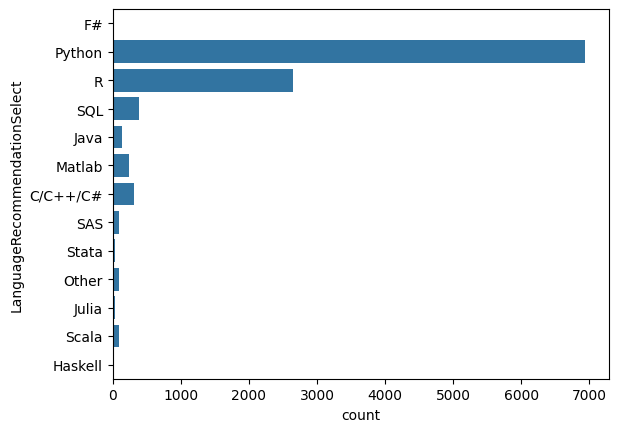

In [5]:
sns.countplot(y='LanguageRecommendationSelect', data=mcq)

<Axes: xlabel='count', ylabel='CurrentJobTitleSelect'>

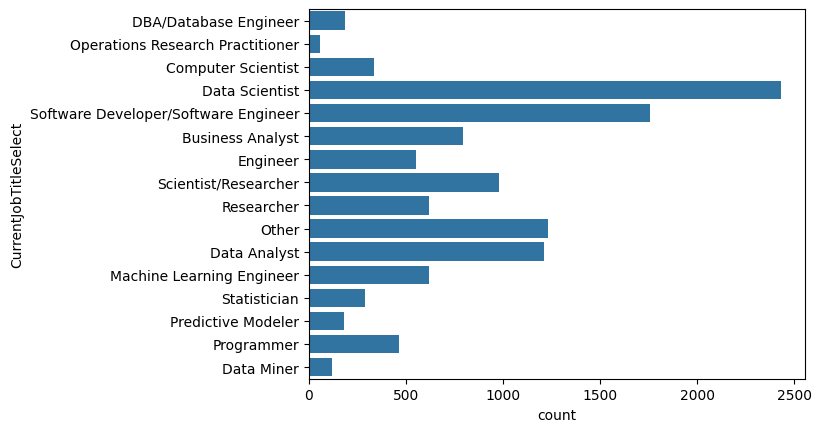

In [6]:
# 현재 하고 있는 일
sns.countplot(y=mcq['CurrentJobTitleSelect'])

In [7]:
# 현재 하고 있는 일에 대한 전체 응답수
mcq[mcq['CurrentJobTitleSelect'].notnull()]['CurrentJobTitleSelect'].shape

(11830,)

(7158, 228)


<Axes: xlabel='count', ylabel='CurrentJobTitleSelect'>

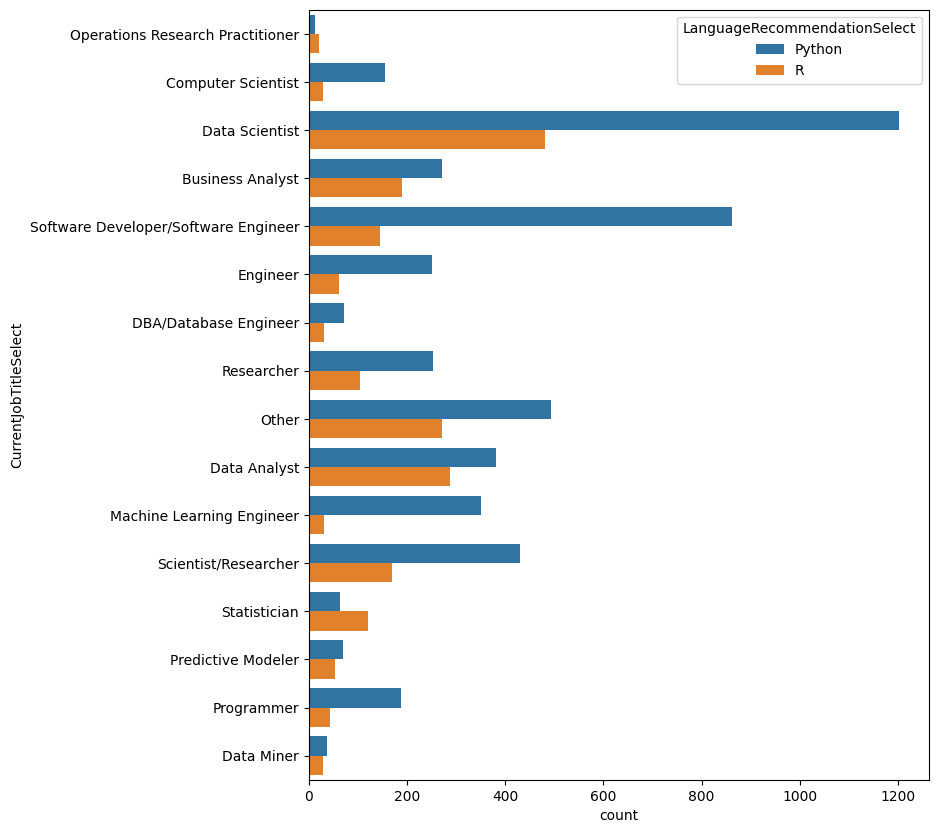

In [8]:
# 현재 하고 있는 일에 대한 응답을 해준 사람 중 Python과 R을 사용하는 사람
# 응답자들이 실제 업무에서 어떤 언어를 주로 사용하는지 볼 수 있다.
data = mcq[(mcq['CurrentJobTitleSelect'].notnull()) & (
    (mcq['LanguageRecommendationSelect'] == 'Python') | (
        mcq['LanguageRecommendationSelect'] == 'R'))]
print(data.shape)
plt.figure(figsize=(8, 10))
sns.countplot(y='CurrentJobTitleSelect',
              hue='LanguageRecommendationSelect',
              data=data)

In [9]:
mcq_ml_tool_count = pd.DataFrame(
    mcq['MLToolNextYearSelect'].value_counts())
mcq_ml_tool_percent = pd.DataFrame(
    mcq['MLToolNextYearSelect'].value_counts(normalize=True))

mcq_ml_tool_df = mcq_ml_tool_count.merge(
    mcq_ml_tool_percent, left_index=True, right_index=True).head(20)
mcq_ml_tool_df.columns = ['응답 수', '비율']
mcq_ml_tool_df

,응답 수,비율
MLToolNextYearSelect,,
TensorFlow,2621,0.238316
Python,1713,0.155756
R,910,0.082742
Spark / MLlib,755,0.068649
Hadoop/Hive/Pig,417,0.037916
Other,407,0.037007
Amazon Machine Learning,392,0.035643
Jupyter notebooks,358,0.032551
I don't plan on learning a new tool/technology,341,0.031006


<Axes: xlabel='count', ylabel='MLToolNextYearSelect'>

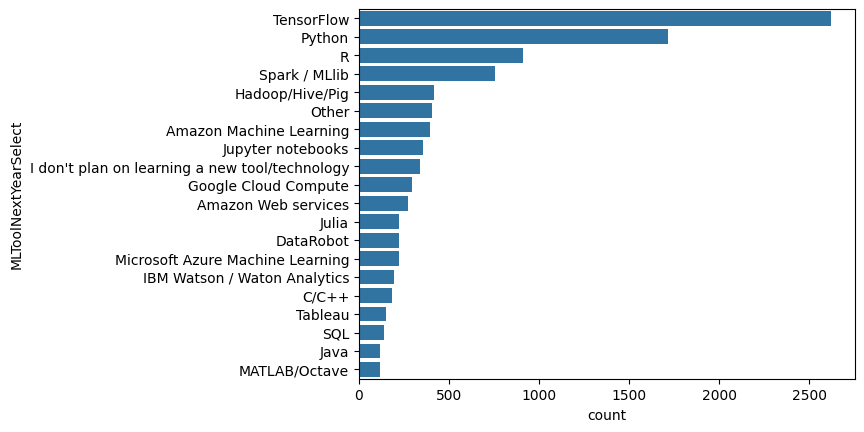

In [10]:
data = mcq['MLToolNextYearSelect'].value_counts().head(20)
sns.barplot(y=data.index, x=data)

<Axes: xlabel='count', ylabel='MLMethodNextYearSelect'>

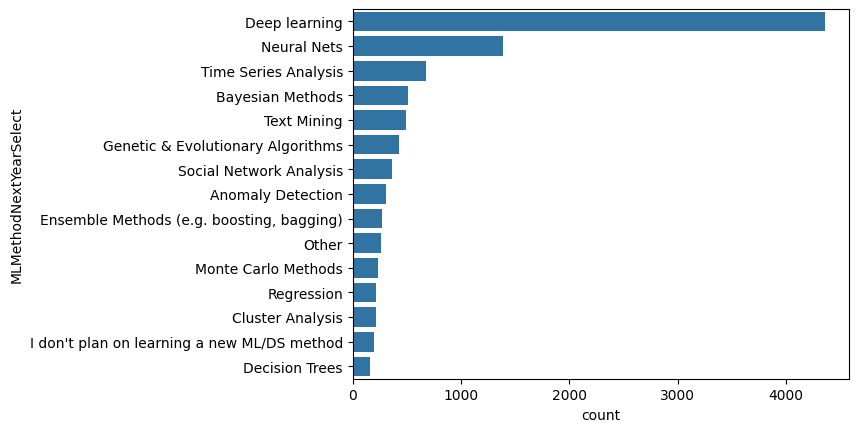

In [11]:
#데이터 사이언스 매소드
data = mcq['MLMethodNextYearSelect'].value_counts().head(15)
sns.barplot(y=data.index, x=data)

In [12]:
#어디서 데이터 사이언스를 배워야 할까
mcq['LearningPlatformSelect'] = mcq['LearningPlatformSelect'].astype('str').apply(lambda x: x.split(','))
s = mcq.apply(
    lambda x: pd.Series(x['LearningPlatformSelect']),
    axis=1).stack().reset_index(level=1, drop=True)
s.name = 'platform'

<Axes: xlabel='count', ylabel='platform'>

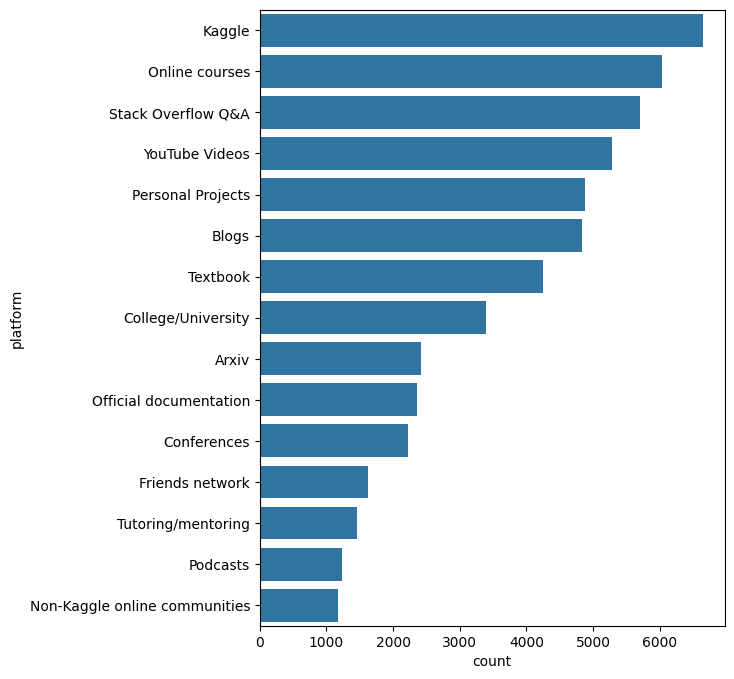

In [13]:
plt.figure(figsize=(6,8))
data = s[s != 'nan'].value_counts().head(15)
sns.barplot(y=data.index, x=data)

In [14]:
# 설문내용과 누구에게 물어봤는지를 찾아봄
qc = question.loc[question[
    'Column'].str.contains('LearningCategory')]
print(qc.shape)
qc

(7, 3)


,Column,Question,Asked
91,LearningCategorySelftTaught,What percentage of your current machine learni...,All
92,LearningCategoryOnlineCourses,What percentage of your current machine learni...,All
93,LearningCategoryWork,What percentage of your current machine learni...,All
94,LearningCategoryUniversity,What percentage of your current machine learni...,All
95,LearningCategoryKaggle,What percentage of your current machine learni...,All
96,LearningCategoryOther,What percentage of your current machine learni...,All
97,LearningCategoryOtherFreeForm,What percentage of your current machine learni...,All


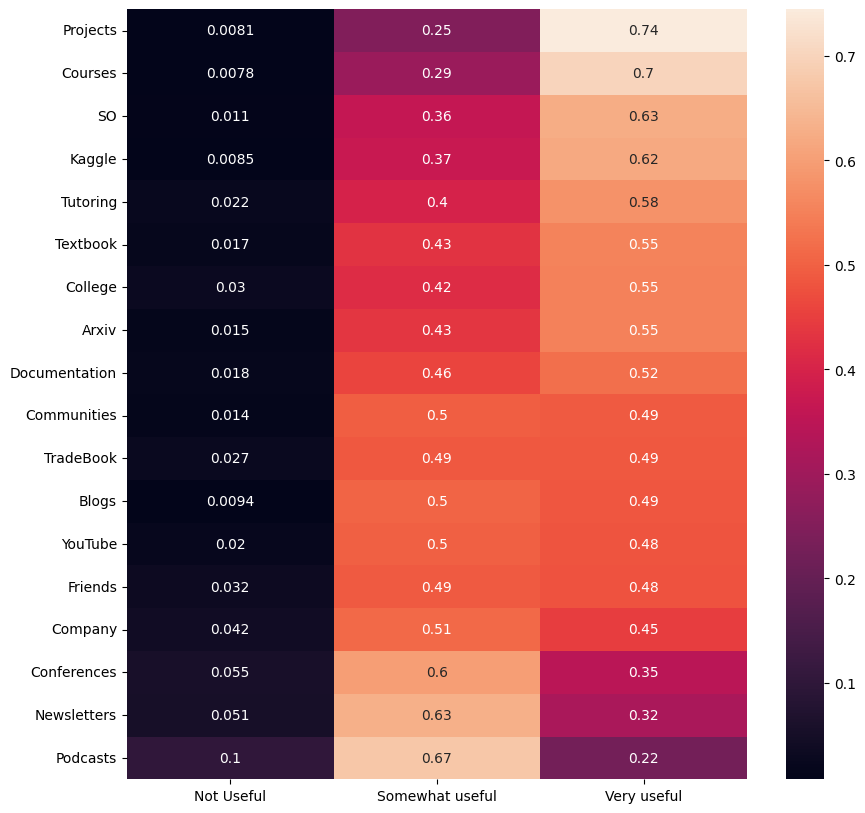

In [16]:
#gpt 도움
#학습플랫폼과 유용함에 대한 연관성을 살펴본다.
# use_features 정의
use_features = [col for col in mcq.columns if 'LearningPlatformUsefulness' in col]

# 데이터 처리
fdf = {}
for feature in use_features:
    a = mcq[feature].value_counts()
    a = a / a.sum()  # 정규화
    fdf[feature[len('LearningPlatformUsefulness'):]] = a

# 데이터프레임 생성 및 정렬
fdf = pd.DataFrame(fdf).transpose().sort_values('Very useful', ascending=False)

# 히트맵 그리기
plt.figure(figsize=(10, 10))
sns.heatmap(fdf.sort_values("Very useful", ascending=False), annot=True)

# 그래프 출력
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Projects'),
  Text(1, 0, 'Courses'),
  Text(2, 0, 'SO'),
  Text(3, 0, 'Kaggle'),
  Text(4, 0, 'Tutoring'),
  Text(5, 0, 'Textbook'),
  Text(6, 0, 'College'),
  Text(7, 0, 'Arxiv'),
  Text(8, 0, 'Documentation'),
  Text(9, 0, 'Communities'),
  Text(10, 0, 'TradeBook'),
  Text(11, 0, 'Blogs'),
  Text(12, 0, 'YouTube'),
  Text(13, 0, 'Friends'),
  Text(14, 0, 'Company'),
  Text(15, 0, 'Conferences'),
  Text(16, 0, 'Newsletters'),
  Text(17, 0, 'Podcasts')])

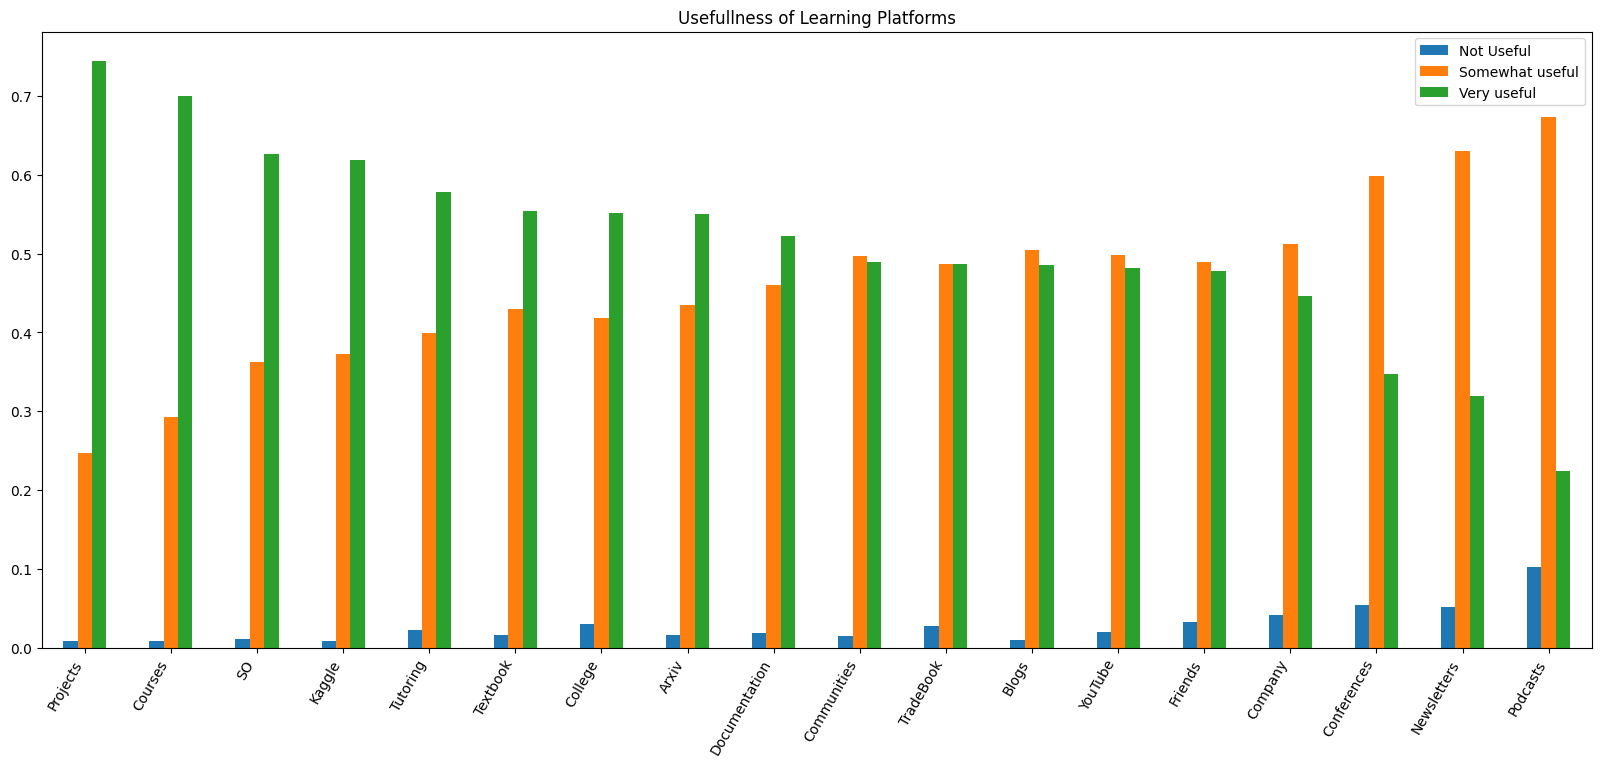

In [17]:
# 유용함의 정도를 각 플랫폼별로 그룹화 해서 본다.
fdf.plot(kind='bar', figsize=(20,8),
         title="Usefullness of Learning Platforms")
plt.xticks(rotation=60, ha='right')

In [18]:
cat_features = [x for x in mcq.columns if x.find(
    'LearningCategory') != -1]
cat_features

['LearningCategorySelftTaught',
 'LearningCategoryOnlineCourses',
 'LearningCategoryWork',
 'LearningCategoryUniversity',
 'LearningCategoryKaggle',
 'LearningCategoryOther']

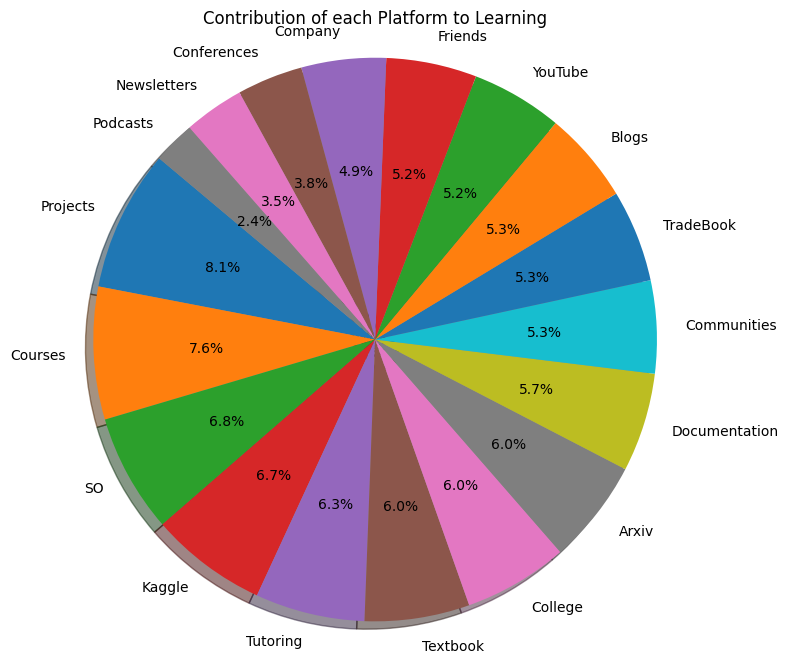

In [33]:
#gpt 도움

# 데이터에서 유용한 플랫폼 비율을 추출
cdf = fdf['Very useful']  # 'Very useful' 열만 추출

# 파이 차트 그리기
plt.figure(figsize=(8, 8))  # 차트 크기 설정
plt.pie(cdf, labels=cdf.index,
        autopct='%1.1f%%', shadow=True, startangle=140)  # 파이 차트 설정
plt.axis('equal')  # 차트의 비율을 원형으로 맞춤
plt.title("Contribution of each Platform to Learning")  # 제목 추가
plt.show()

In [22]:
#데이터 과학을 위해 높은 사양의 컴퓨터가 필요한가
# 설문내용과 누구에게 물어봤는지를 찾아봄
qc = question.loc[question[
    'Column'].str.contains('HardwarePersonalProjectsSelect')]
print(qc.shape)
qc

(1, 3)


,Column,Question,Asked
74,HardwarePersonalProjectsSelect,Which computing hardware do you use for your p...,Learners


In [23]:
mcq[mcq['HardwarePersonalProjectsSelect'].notnull()][
    'HardwarePersonalProjectsSelect'].shape

(4206,)

In [24]:
mcq['HardwarePersonalProjectsSelect'
   ] = mcq['HardwarePersonalProjectsSelect'
          ].astype('str').apply(lambda x: x.split(','))
s = mcq.apply(lambda x:
              pd.Series(x['HardwarePersonalProjectsSelect']),
              axis=1).stack().reset_index(level=1, drop=True)
s.name = 'hardware'

In [25]:
s = s[s != 'nan']

In [26]:
pd.DataFrame(s.value_counts())

,count
hardware,
Basic laptop (Macbook),2246
Laptop + Cloud service (AWS,669
Azure,669
GCE ...),669
Gaming Laptop (Laptop + CUDA capable GPU),641
Traditional Workstation,527
Laptop or Workstation and local IT supported servers,445
GPU accelerated Workstation,416
Workstation + Cloud service,174


In [27]:
#데이터 사이언스 공부 시간

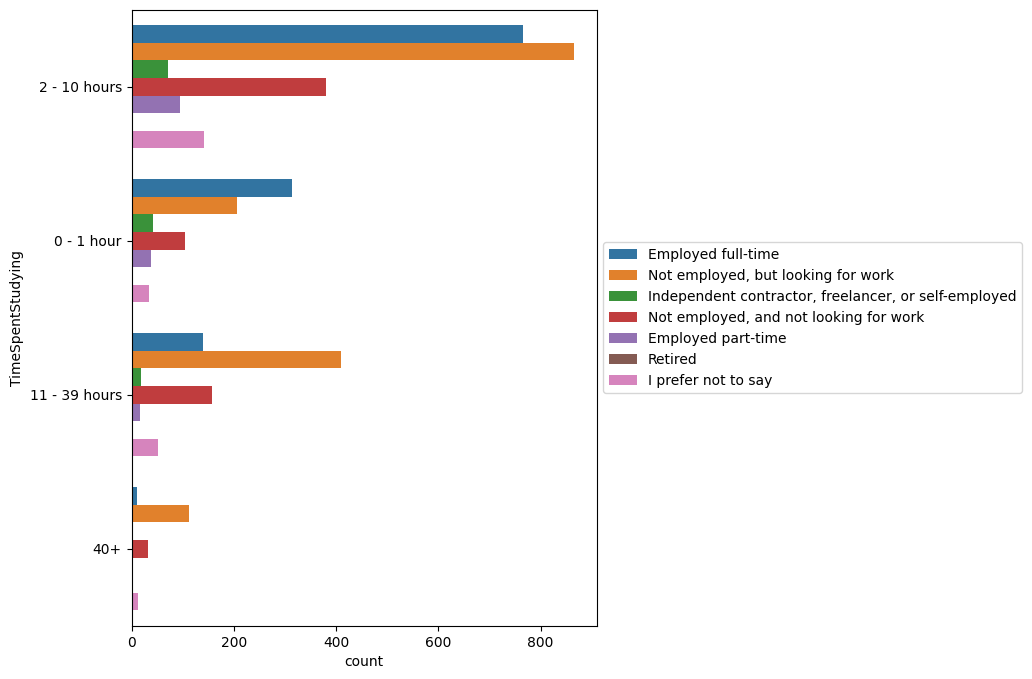

In [34]:
#gpt 도움
import matplotlib.pyplot as plt  # plt가 matplotlib.pyplot을 가리키는지 확인

# 그래프 그리기
plt.figure(figsize=(6, 8))
sns.countplot(y='TimeSpentStudying',
              data=mcq,
              hue='EmploymentStatus'
             ).legend(loc='center left',
                      bbox_to_anchor=(1, 0.5))
plt.show()

In [29]:
full_time = mcq.loc[(mcq['EmploymentStatus'] == 'Employed full-time')]
print(full_time.shape)
looking_for_job = mcq.loc[(
    mcq['EmploymentStatus'] == 'Not employed, but looking for work')]
print(looking_for_job.shape)

(10897, 228)
(2110, 228)


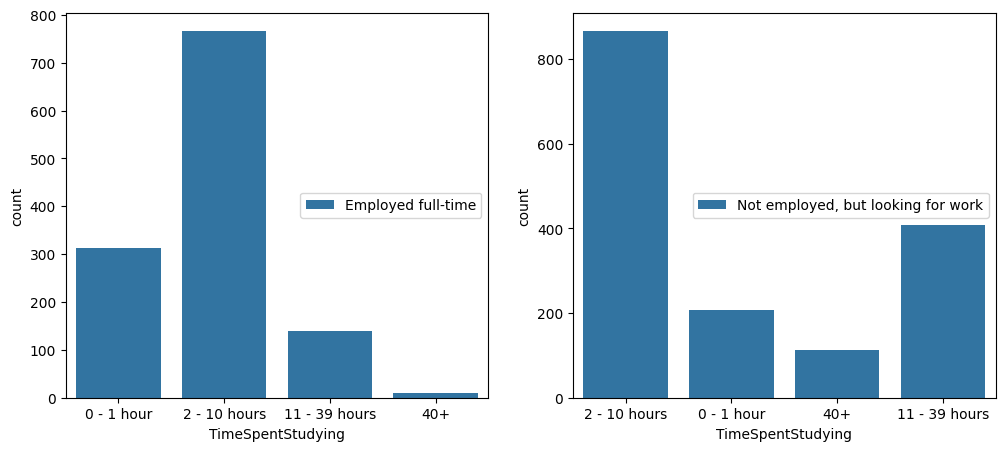

In [30]:
figure, (ax1, ax2) = plt.subplots(ncols=2)

figure.set_size_inches(12,5)
sns.countplot(x='TimeSpentStudying',
              data=full_time,
              hue='EmploymentStatus', ax=ax1
             ).legend(loc='center right',
                      bbox_to_anchor=(1, 0.5))

sns.countplot(x='TimeSpentStudying',
              data=looking_for_job,
              hue='EmploymentStatus', ax=ax2
             ).legend(loc='center right',
                      bbox_to_anchor=(1, 0.5))